In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn faker pyarrow category_encoders anonymizedf

In [2]:
# Uso de EDA y Anonimización Modular
# ===========================================
# Este notebook muestra el código modular para el EDA del proyecto de anonimización de datos bancarios

# Importar las funciones del módulo principal
# -----------------------------------------
# Cargando el código módular como 'eda_anonimizacion_modular.py'
from eda_anonimizacion_modular import *

In [3]:
# Ejecutar el proceso completo
# --------------------------
print("Ejecutando proceso completo de análisis y anonimización...\n")

Ejecutando proceso completo de análisis y anonimización...



In [4]:
# Defino rutas de archivosa necesario)
ruta_entrada = "../dataset/anonimizacion_datos.csv"
ruta_salida = "dataset/anonimizacion_datos_anonimizado.csv"

In [5]:
# Ejecutando las funciones de forma módular
# ------------------------------------------------------------
print("\n\nEjecutando funciones individuales para un mayor control...\n")

# 1. Cargar y analizar datos
df = cargar_datos(ruta_entrada)
mostrar_info_basica(df)



Ejecutando funciones individuales para un mayor control...

Dataset cargado con 6362620 filas y 11 columnas.

===== INFORMACIÓN BÁSICA DEL DATASET =====

Primeras 5 filas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


None


Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.397246,142.331971,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.903549,603858.231463,0.0,13389.57,74871.94,208721.4775,92445516.64
nameOrig,6362620,6353307,C1677795071,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.104074,2888242.673038,0.0,0.0,14208.0,107315.175,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.668579,2924048.502954,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.66652,3399180.112994,0.0,0.0,132705.665,943036.7075,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.398202,3674128.94212,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.001291,0.035905,0.0,0.0,0.0,0.0,1.0



Valores nulos por columna:


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Analizando sólo los patrones de fraude:

Distribución de tipos de transacciones:


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Distribución de transacciones fraudulentas:


isFraud
0    6354407
1       8213
Name: count, dtype: int64


Porcentaje de transacciones fraudulentas: 0.13 %

===== ANÁLISIS DE FRAUDE POR TIPO DE TRANSACCIÓN =====


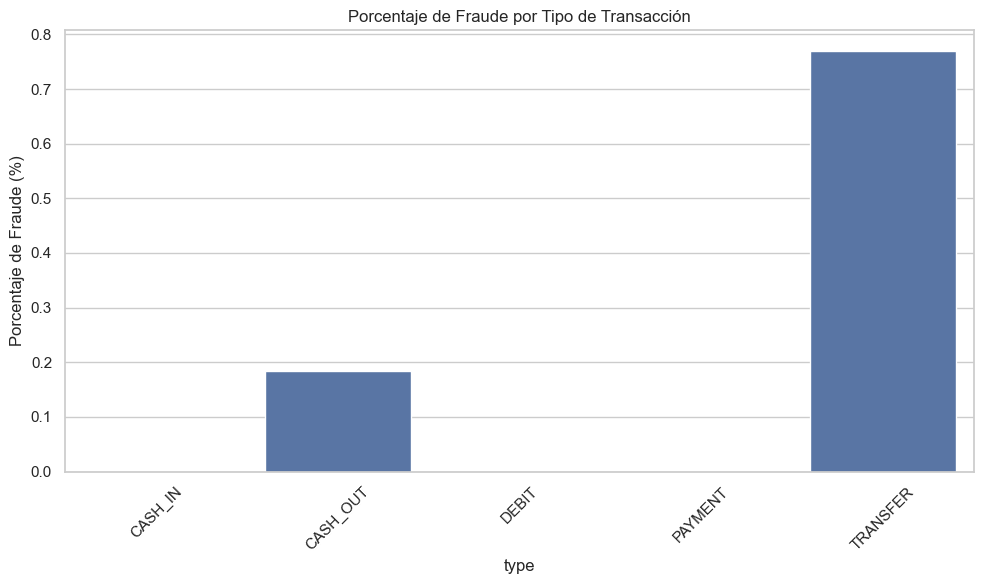

In [6]:
# 2. Análisis específico de fraude
print("\nAnalizando sólo los patrones de fraude:")
analizar_transacciones_fraude(df)
analizar_fraude_por_tipo(df)

In [7]:
# 3. Ejecutar solo la anonimización
print("\nEjecutando solo la anonimización:")
df_anon, fake = iniciar_anonimizacion(df)
df_anon = anonimizar_ids(df_anon)
df_anon = anonimizar_valores_numericos(df_anon)


Ejecutando solo la anonimización:

===== INICIANDO PROCESO DE ANONIMIZACIÓN =====

===== ANONIMIZANDO IDs =====

===== ANONIMIZANDO VALORES NUMÉRICOS =====


In [8]:
# 4. Verificar solo ciertos aspectos
verificar_ids_anonimizados(df, df_anon, ['nameOrig', 'nameDest'])


===== VERIFICACIÓN DE IDs ANONIMIZADOS =====

Solapamiento de valores en columna 'nameOrig': 9163 valores

Muestra comparativa de anonimización para 'nameOrig':


,Original,Anonimizado
0,C1231006815,C0629063555
1,C1666544295,C2963615136
2,C1305486145,C0097193118
3,C840083671,C655533211
4,C2048537720,C3822163952
5,C90045638,C84537727
6,C154988899,C342239180
7,C1912850431,C5039753211
8,C1265012928,C1527969945
9,C712410124,C857873594



Solapamiento de valores en columna 'nameDest': 1608 valores

Muestra comparativa de anonimización para 'nameDest':


,Original,Anonimizado
0,M1979787155,M5316913500
1,M2044282225,M8898135238
2,C553264065,C973190739
3,C38997010,C00283638
4,M1230701703,M5311913982
5,M573487274,M111337598
6,M408069119,M738861843
7,M633326333,M899827202
8,M1176932104,M7906281565
9,C195600860,C980784540


Dataset cargado con 6362620 filas y 11 columnas.

===== INFORMACIÓN BÁSICA DEL DATASET =====

Primeras 5 filas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


None


Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.397246,142.331971,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.903549,603858.231463,0.0,13389.57,74871.94,208721.4775,92445516.64
nameOrig,6362620,6353307,C1677795071,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.104074,2888242.673038,0.0,0.0,14208.0,107315.175,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.668579,2924048.502954,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.66652,3399180.112994,0.0,0.0,132705.665,943036.7075,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.398202,3674128.94212,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.001291,0.035905,0.0,0.0,0.0,0.0,1.0



Valores nulos por columna:


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

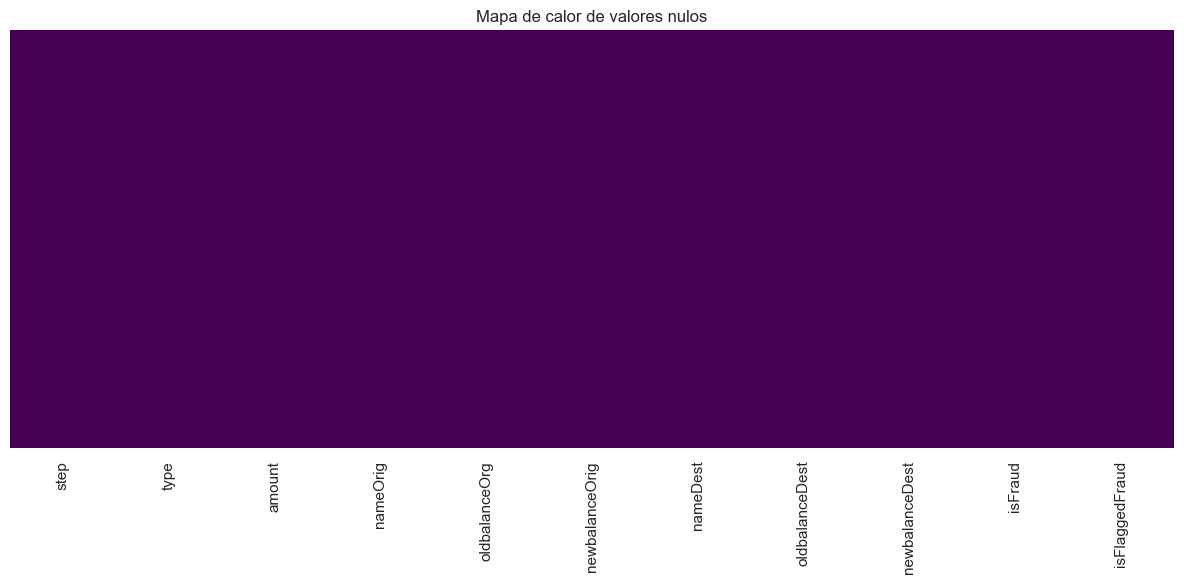


===== IDENTIFICACIÓN DE DATOS SENSIBLES =====

Columnas con información sensible identificadas:


['nameOrig', 'nameDest']


Columnas categóricas:


['type', 'nameOrig', 'nameDest']


Valores únicos en columna 'type': 5


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Valores únicos en columna 'nameOrig': 6353307


nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64


Valores únicos en columna 'nameDest': 2722362


nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64


Distribución de tipos de transacciones:


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Distribución de transacciones fraudulentas:


isFraud
0    6354407
1       8213
Name: count, dtype: int64


Porcentaje de transacciones fraudulentas: 0.13 %

===== ANÁLISIS DE VARIABLES NUMÉRICAS =====


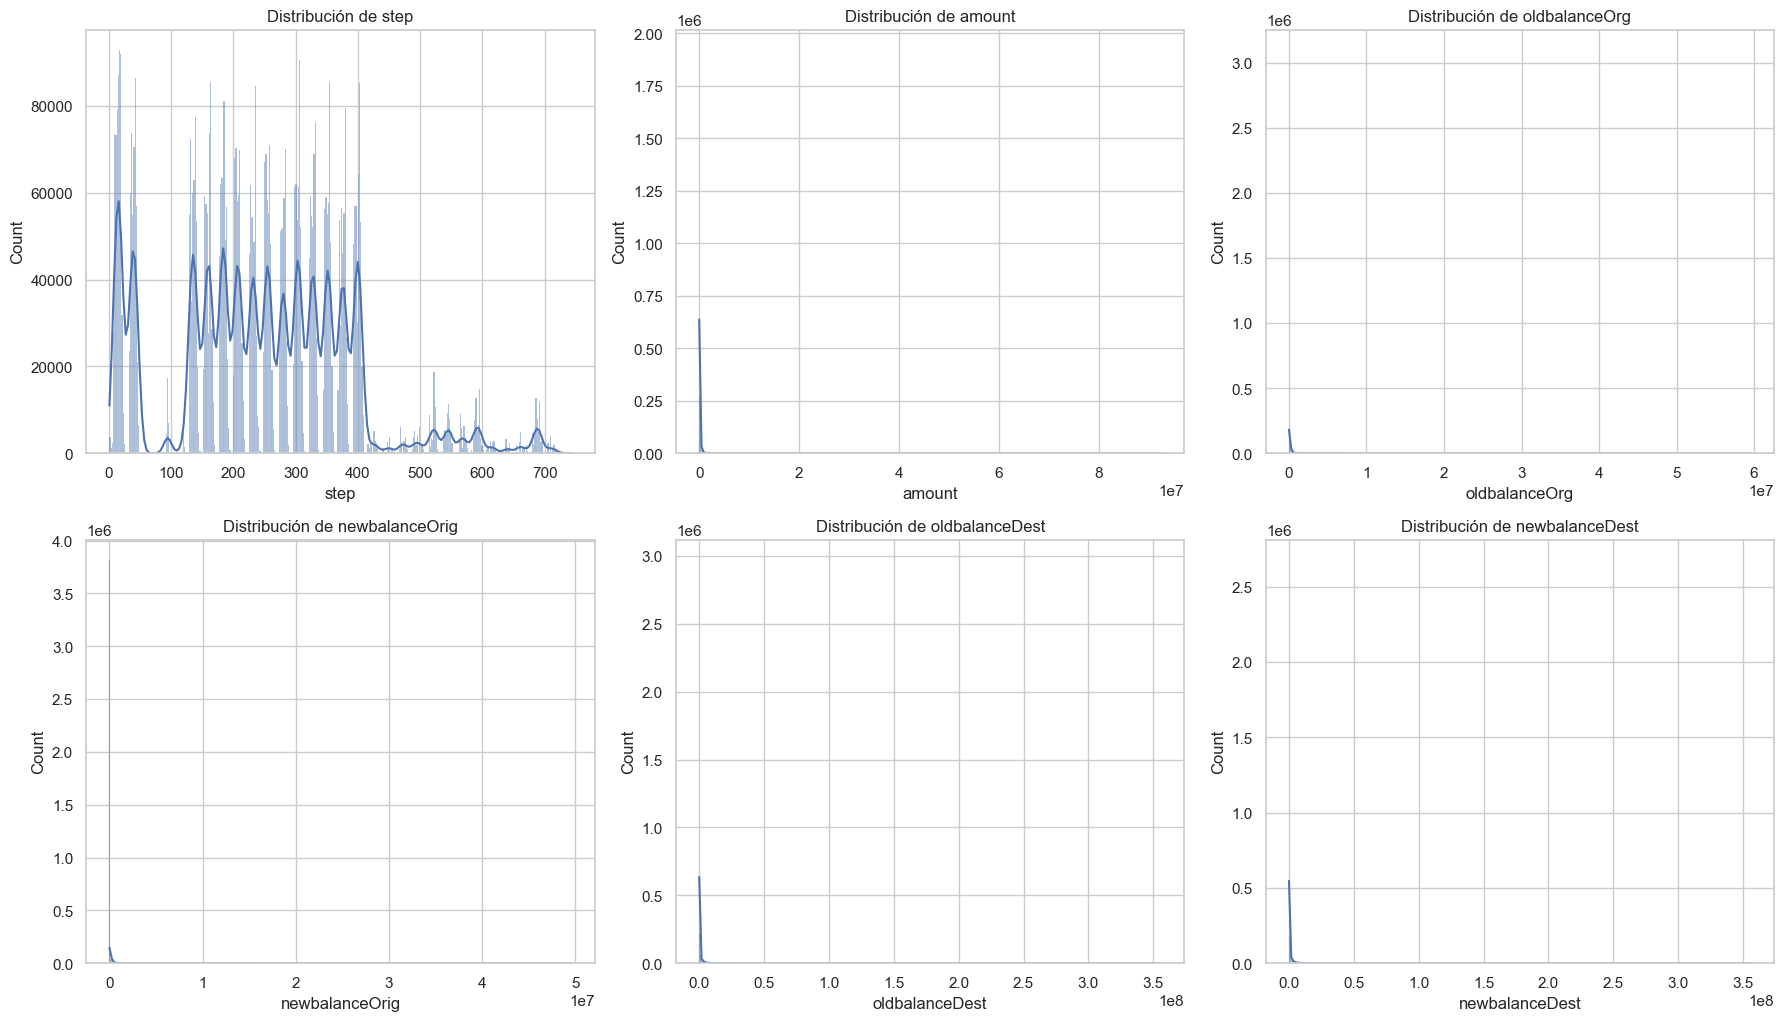

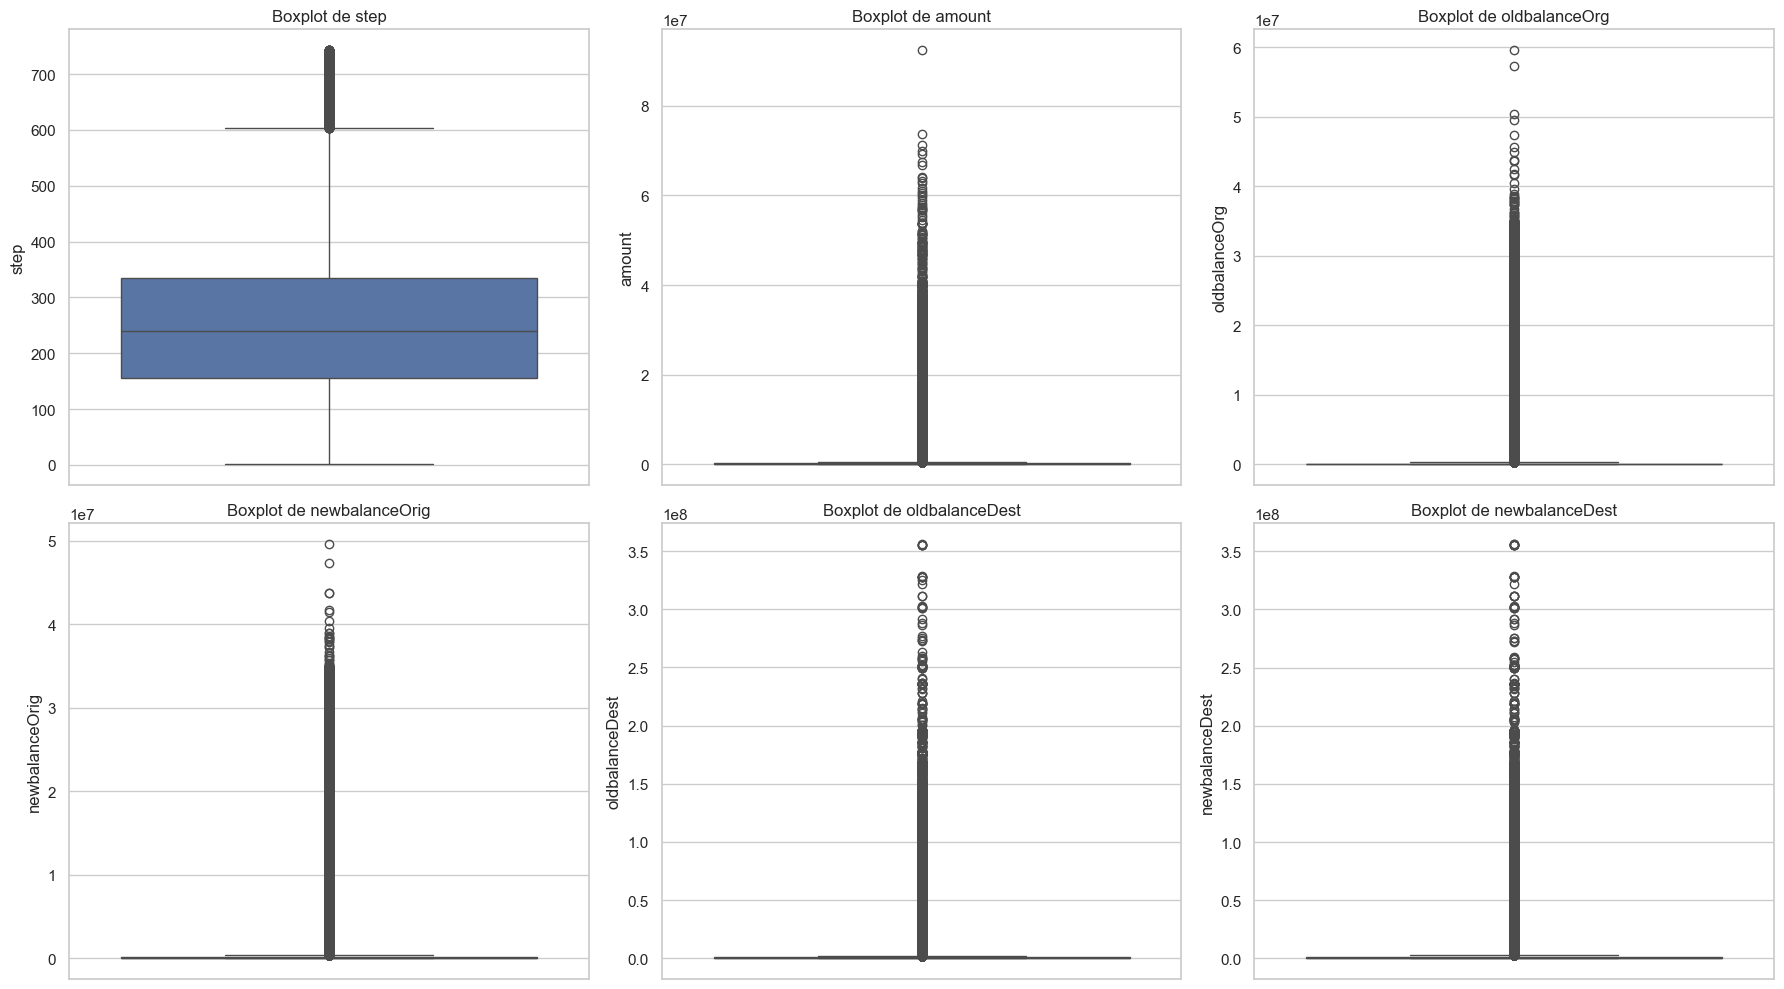


===== ANÁLISIS DE MONTOS POR TIPO Y FRAUDE =====


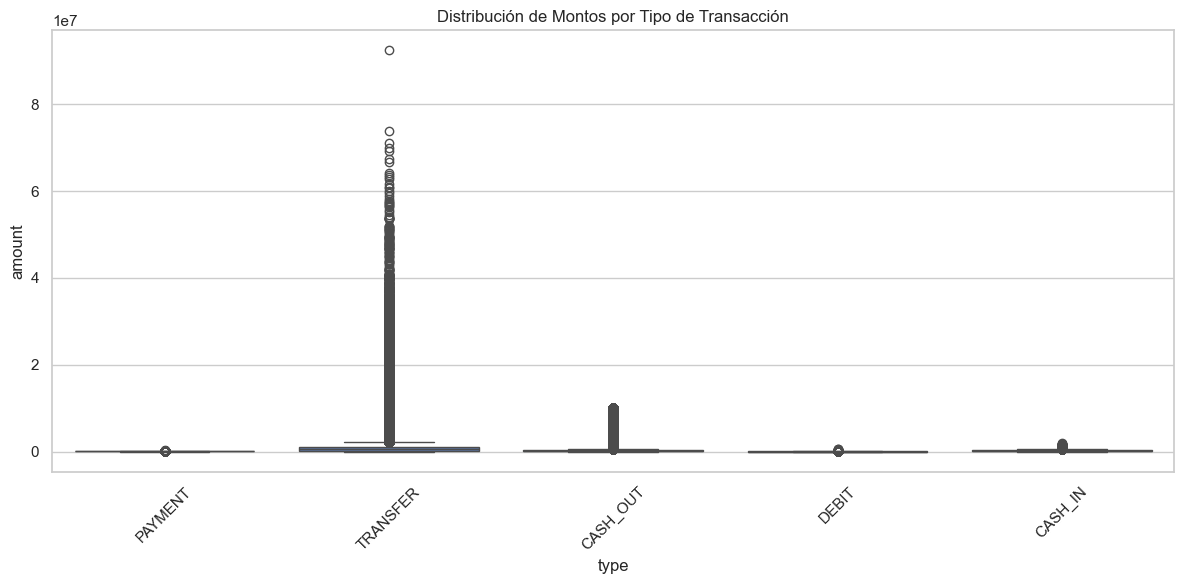

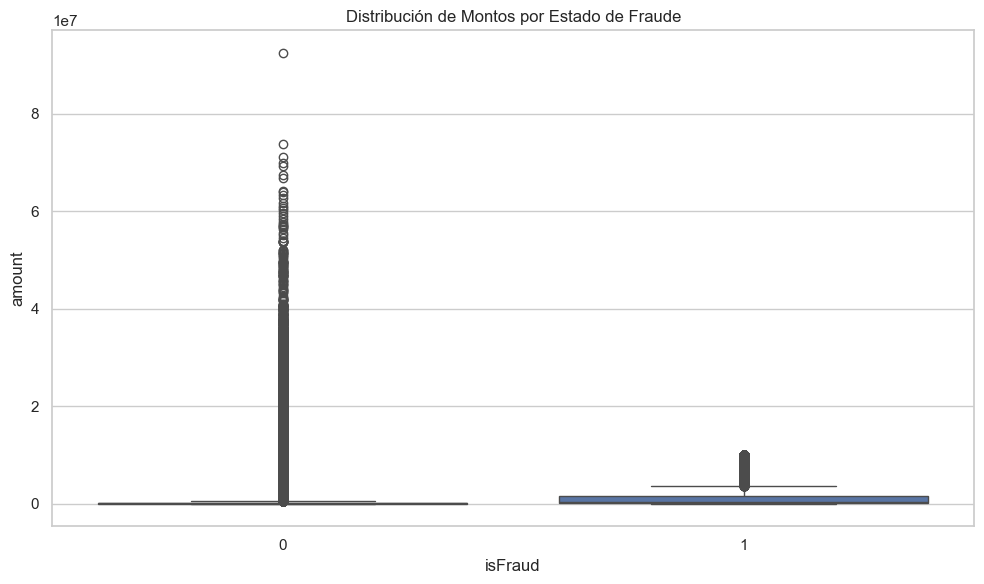


===== MATRIZ DE CORRELACIÓN =====


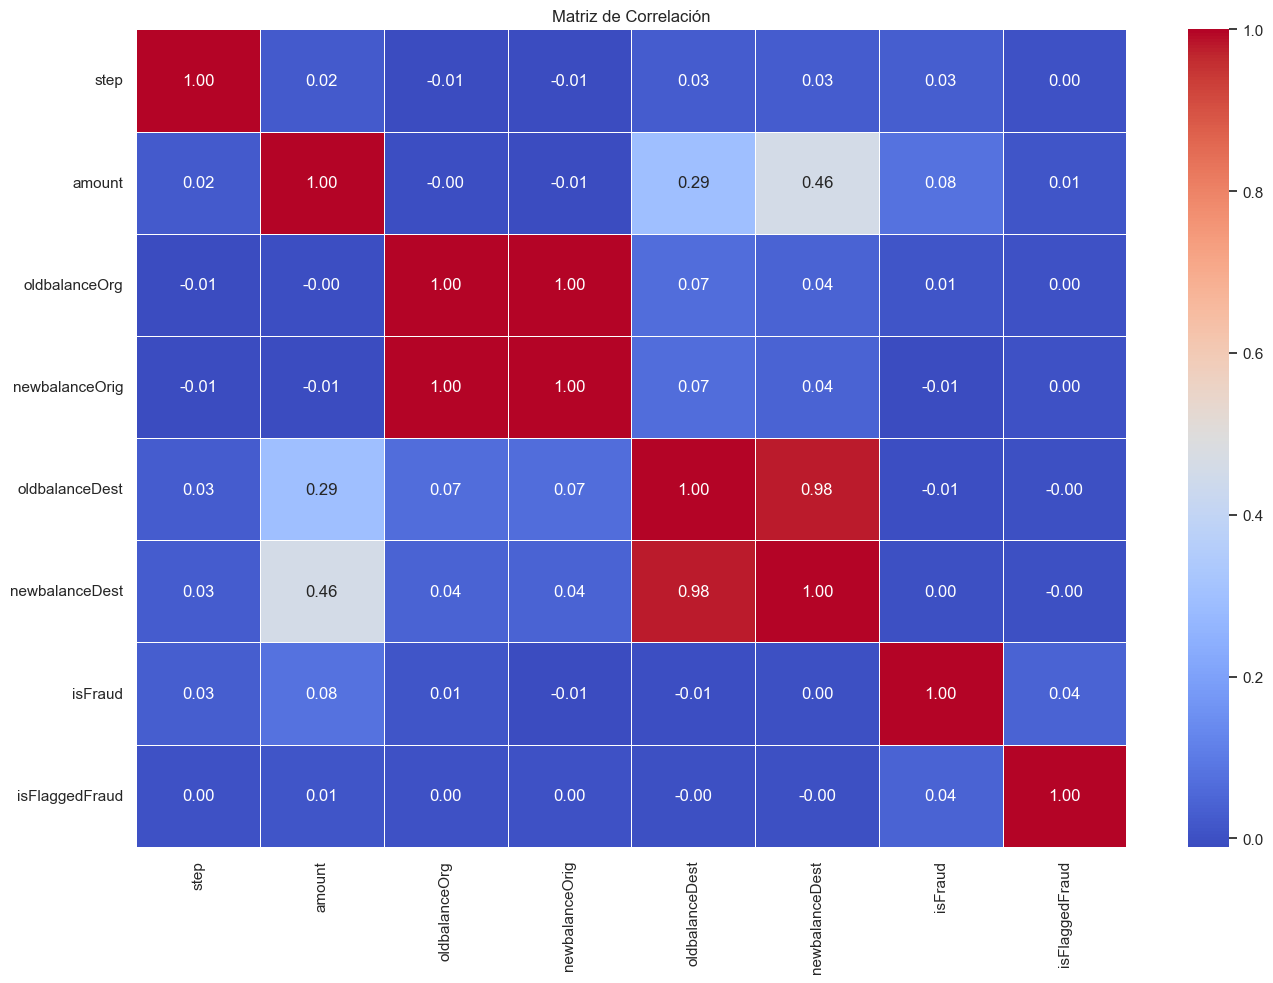


===== ANÁLISIS DE BALANCES =====


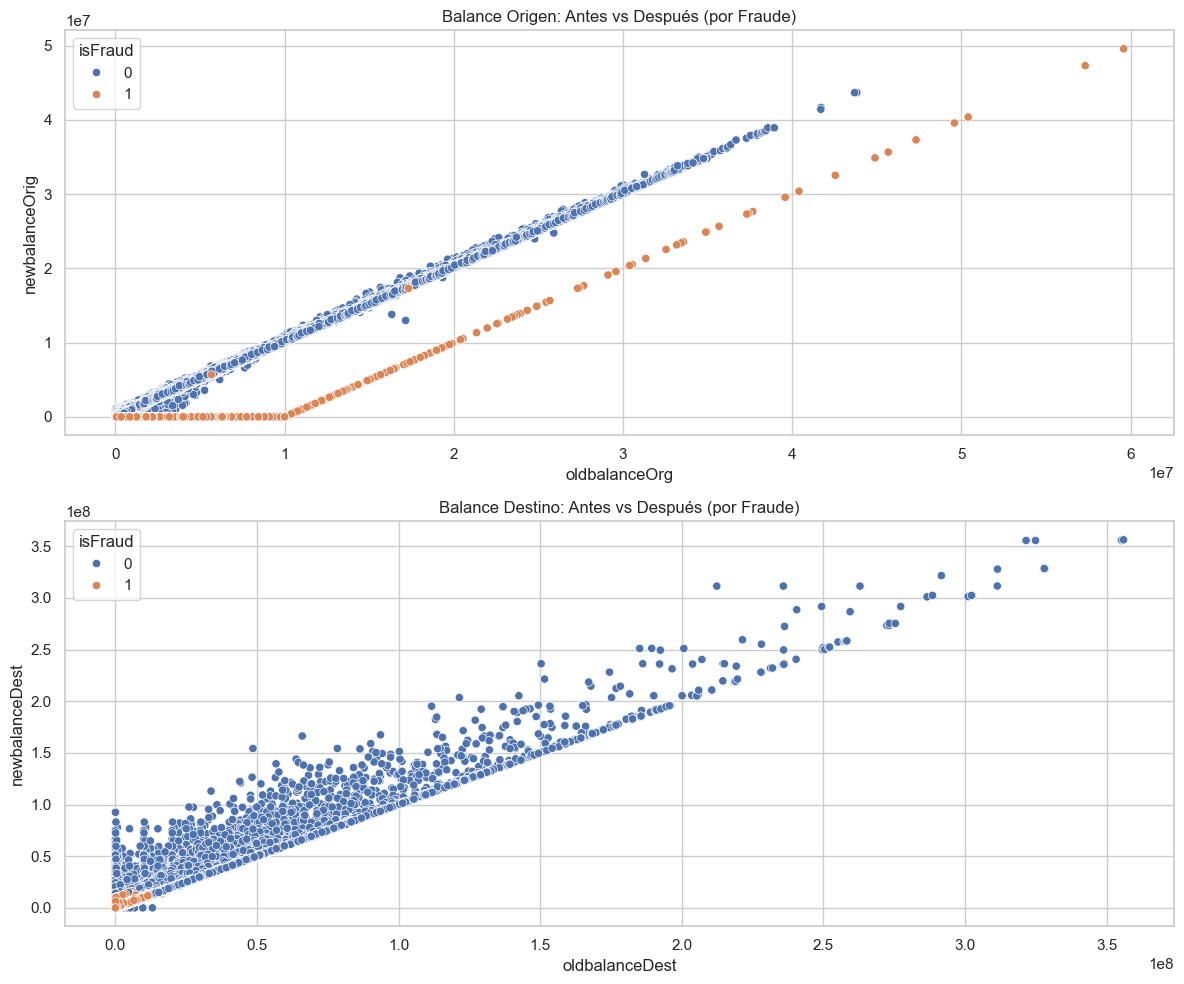


===== ANÁLISIS DE PATRONES TEMPORALES =====


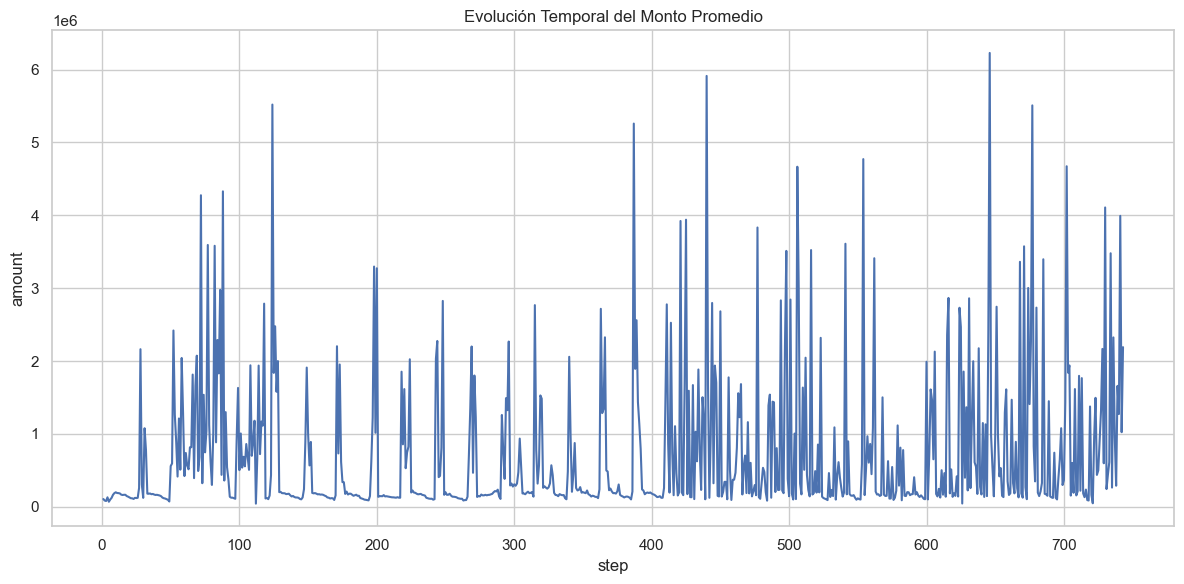


===== ANÁLISIS DE FRAUDE POR TIPO DE TRANSACCIÓN =====


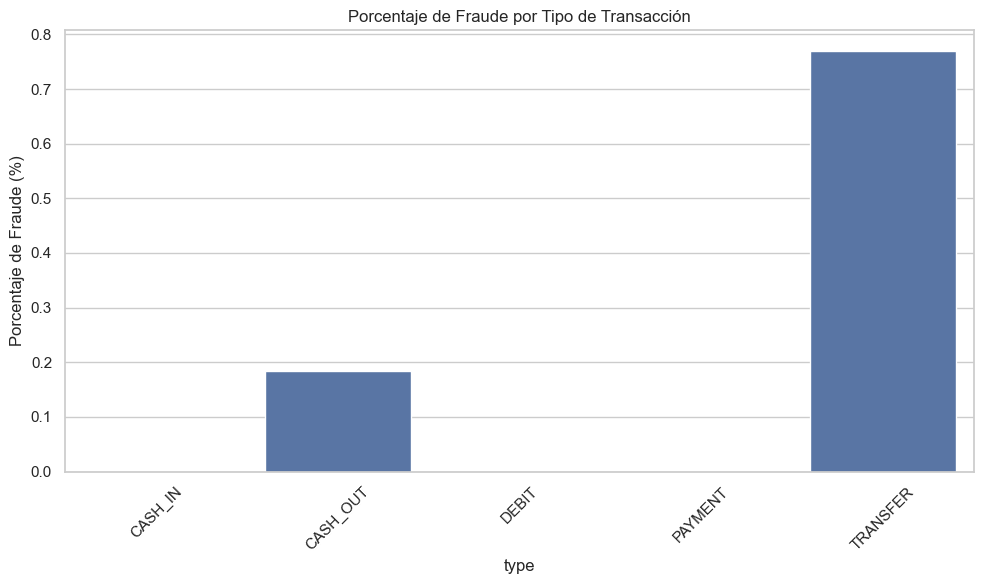


===== INICIANDO PROCESO DE ANONIMIZACIÓN =====
Formato de nameOrig: C1231006815
Formato de nameDest: M1979787155
Prefijos detectados en nameOrig: {'C'}

===== ANONIMIZANDO IDs =====

===== ANONIMIZANDO VALORES NUMÉRICOS =====

===== ANONIMIZANDO DIMENSIÓN TEMPORAL =====

===== COMPARACIÓN DE ESTADÍSTICAS =====
Estadísticas descriptivas originales:


,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00



Estadísticas descriptivas después de anonimización:


,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.000000,239.000000,3.350000e+02,7.430000e+02
amount,6362620.0,1.812204e+05,6.036953e+05,0.0,17846.979139,75612.357547,2.095255e+05,9.244183e+07
oldbalanceOrg,6362620.0,8.466215e+05,2.885515e+06,0.0,0.000000,0.000000,1.714440e+05,5.952145e+07
newbalanceOrig,6362620.0,8.610554e+05,2.923252e+06,0.0,0.000000,0.000000,1.793191e+05,4.948490e+07
oldbalanceDest,6362620.0,1.103099e+06,3.399764e+06,0.0,0.000000,127208.719514,9.522092e+05,3.560762e+08
newbalanceDest,6362620.0,1.227424e+06,3.674654e+06,0.0,0.000000,220881.782317,1.121037e+06,3.562192e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.000000,0.000000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.000000,0.000000,0.000000e+00,1.000000e+00
step_bin,6362620.0,2.409678e+02,1.424008e+02,0.0,156.000000,234.000000,3.300000e+02,7.380000e+02



===== VERIFICACIÓN DE IDs ANONIMIZADOS =====

Solapamiento de valores en columna 'nameOrig': 8953 valores

Muestra comparativa de anonimización para 'nameOrig':


,Original,Anonimizado
0,C1231006815,C6012621043
1,C1666544295,C8360324754
2,C1305486145,C8494627395
3,C840083671,C355842151
4,C2048537720,C4316750560
5,C90045638,C22817972
6,C154988899,C750914006
7,C1912850431,C5969702514
8,C1265012928,C5359469674
9,C712410124,C058089109



Solapamiento de valores en columna 'nameDest': 1509 valores

Muestra comparativa de anonimización para 'nameDest':


,Original,Anonimizado
0,M1979787155,M4436649371
1,M2044282225,M7769266053
2,C553264065,C103593346
3,C38997010,C09709577
4,M1230701703,M5909244151
5,M573487274,M931025087
6,M408069119,M220361158
7,M633326333,M891662875
8,M1176932104,M0143760562
9,C195600860,C228374161



===== EVALUACIÓN DE RIESGO DE REIDENTIFICACIÓN =====
Combinación ('step_bin', 'type'): 1 registros únicamente identificables (0.00%)
Combinación ('step_bin', 'amount'): 5651281 registros únicamente identificables (88.82%)
Combinación ('step_bin', 'oldbalanceOrg'): 3177531 registros únicamente identificables (49.94%)
Combinación ('step_bin', 'newbalanceOrig'): 2317995 registros únicamente identificables (36.43%)
Combinación ('type', 'amount'): 5651277 registros únicamente identificables (88.82%)
Combinación ('type', 'oldbalanceOrg'): 3177531 registros únicamente identificables (49.94%)
Combinación ('type', 'newbalanceOrig'): 2317995 registros únicamente identificables (36.43%)
Combinación ('amount', 'oldbalanceOrg'): 5984005 registros únicamente identificables (94.05%)
Combinación ('amount', 'newbalanceOrig'): 5932457 registros únicamente identificables (93.24%)
Combinación ('oldbalanceOrg', 'newbalanceOrig'): 3528512 registros únicamente identificables (55.46%)
Combinación ('step_bin'

Traceback (most recent call last):
  File "c:\Users\alexi\AppData\Local\Microsoft\Windows\INetCache\IE\TAEO1ECE\TFM_Anonimizacion_RegresionLogistica\venv\eda_anonimizacion_modular.py", line 606, in ejecutar_analisis_anonimizacion
    exportar_datos_anonimizados(df_anonimizado, ruta_salida)
  File "c:\Users\alexi\AppData\Local\Microsoft\Windows\INetCache\IE\TAEO1ECE\TFM_Anonimizacion_RegresionLogistica\venv\eda_anonimizacion_modular.py", line 480, in exportar_datos_anonimizados
    df_anonimizado.to_csv(ruta_salida, index=False)
  File "c:\Users\alexi\AppData\Local\Microsoft\Windows\INetCache\IE\TAEO1ECE\TFM_Anonimizacion_RegresionLogistica\venv\Lib\site-packages\pandas\util\_decorators.py", line 333, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alexi\AppData\Local\Microsoft\Windows\INetCache\IE\TAEO1ECE\TFM_Anonimizacion_RegresionLogistica\venv\Lib\site-packages\pandas\core\generic.py", line 3986, in to_csv
    return DataFrameRenderer(f

In [9]:
# Ejecutar todo el proceso
df_original, df_anonimizado = ejecutar_analisis_anonimizacion(ruta_entrada, ruta_salida)